In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
from OpenXAI.openxai.dataloader import return_loaders, TabularDataLoader

dataset = TabularDataLoader(
    path="Synthetic",
    filename="test",
    label="y",
    scale="minmax")

print(dataset)

In [17]:
from network.training_synth_gauss import train_model

model = train_model(
    dataset='synthetic',
    layers=[20,30,10],
    num_epochs=10
)[0]

100%|██████████| 10/10 [00:40<00:00,  4.00s/it]


Final metrics: 
Validation-Loss:  0.014
Validation-Accuracy:  91.4%
train-Loss:  0.009
train-Accuracy:  91.6%
# Parameters: 940
NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=10, bias=True)
  )
)


  0%|          | 0/6250 [00:00<?, ?it/s]

/home/leon/programming/XAI-baselines/network/models.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
100%|██████████| 6250/6250 [00:14<00:00, 435.26it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


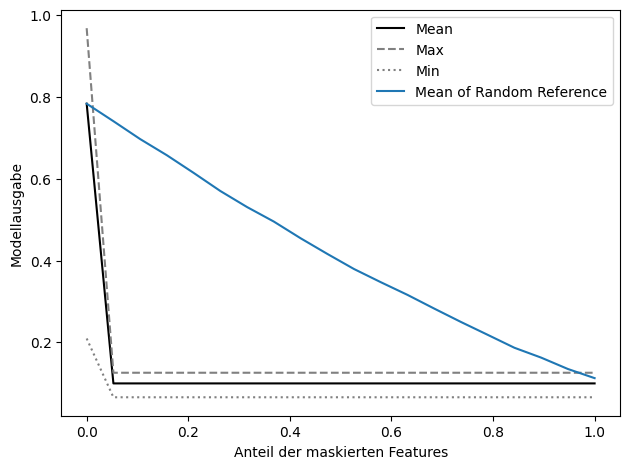

In [3]:
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
from captum.attr import IntegratedGradients

am_eval = AttributionMethodsEvaluator(model)

ig = IntegratedGradients(model)
model.eval()

am_eval.visualize_log_odds_of_dataset(
    attribute=ig.attribute,
    title="",
    apply_log=False
)



  0%|          | 0/6250 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
100%|██████████| 6250/6250 [00:12<00:00, 494.65it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


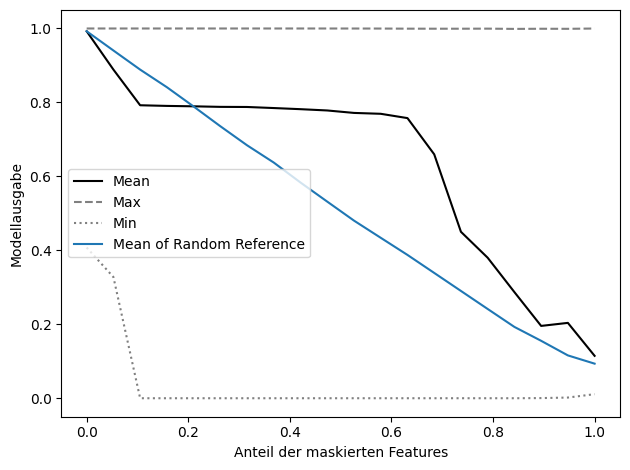

In [18]:
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
am_eval = AttributionMethodsEvaluator(model)
am_eval.visualize_log_odds_of_ground_truth_masked_weights(
    title="",
    apply_log=False
)

  0%|          | 0/6250 [00:00<?, ?it/s]/home/leon/programming/XAI-baselines/network/models.py:50: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(y).detach()
100%|██████████| 6250/6250 [00:12<00:00, 497.98it/s]
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


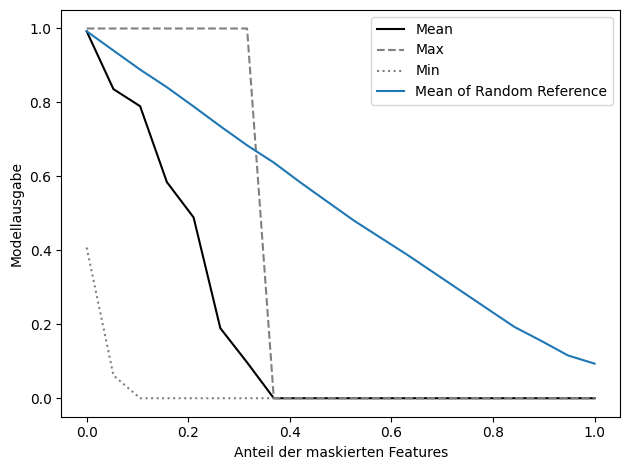

In [19]:
from evaluation.attribution_methods_evaluator import AttributionMethodsEvaluator
am_eval = AttributionMethodsEvaluator(model)
am_eval.visualize_log_odds_of_ground_truth_binary_mask(
    title="",
    apply_log=False
)


In [16]:
import numpy as np
from itertools import combinations

x = np.array([1, 0, 1, 0, 1])

masked_indices = np.where(x == 1)[0]

for i in range(1, len(masked_indices)+1):
    for subset in combinations(masked_indices, i):
        print(len(subset))
        print(subset)

1
(0,)
1
(2,)
1
(4,)
2
(0, 2)
2
(0, 4)
2
(2, 4)
3
(0, 2, 4)
